# Chronic Kidney Disease Prediction

## Aim

Predict whether a patient has Chronic Kidney Disease (CKD) using lab results and demographic data with machine learning models (Random Forest, Gradient Boosting).

## Project Description

Chronic Kidney Disease (CKD) affects millions globally and often progresses silently. Early detection is essential for effective treatment.
This project builds machine learning models that can automatically detect CKD based on medical attributes such as blood pressure, glucose levels, red blood cell count, and more.
By using Random Forest and Gradient Boosting algorithms, the model aims to achieve 90–95% accuracy and support doctors in identifying at-risk patients early.

####  Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("✅ Libraries Imported Successfully")


✅ Libraries Imported Successfully


#### Load Dataset

In [2]:

# Dataset link: https://www.kaggle.com/datasets/mansoordaku/ckdisease
# Download and rename as 'kidney_disease.csv'

df = pd.read_csv("kidney_disease[1].csv")
print("✅ Dataset Loaded Successfully")
print("Shape of Dataset:", df.shape)
df.head()

✅ Dataset Loaded Successfully
Shape of Dataset: (400, 26)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


#### Explore Dataset

In [3]:
# Basic Info
print(df.info())

#Missing Values
print(df.isnull().sum())

#Unique Values in Target
print(df['classification'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

#### Analyze Categorical Variables

In [4]:

#Value counts for each categorical column
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for rbc:
rbc
normal      201
abnormal     47
Name: count, dtype: int64

Value counts for pc:
pc
normal      259
abnormal     76
Name: count, dtype: int64

Value counts for pcc:
pcc
notpresent    354
present        42
Name: count, dtype: int64

Value counts for ba:
ba
notpresent    374
present        22
Name: count, dtype: int64

Value counts for pcv:
pcv
41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
27       3
22       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
14       1
\t?      1
16       1
Name: count, dtype: int64

Value counts for wc:
wc
9800     11
6700     10
9200      9
9600      9
7200      9
         ..
19100     1
\t?       

C:\Users\harit\AppData\Local\Temp\ipykernel_18924\2766343707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


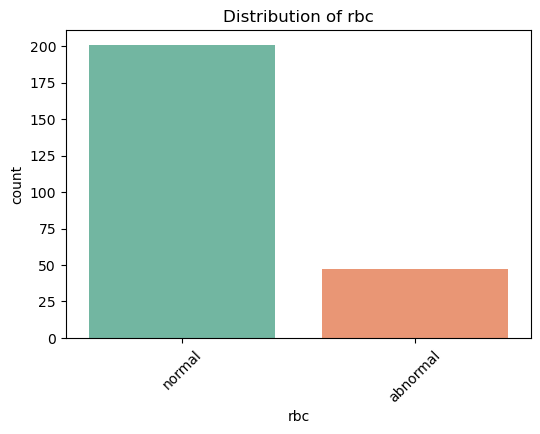

C:\Users\harit\AppData\Local\Temp\ipykernel_18924\2766343707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


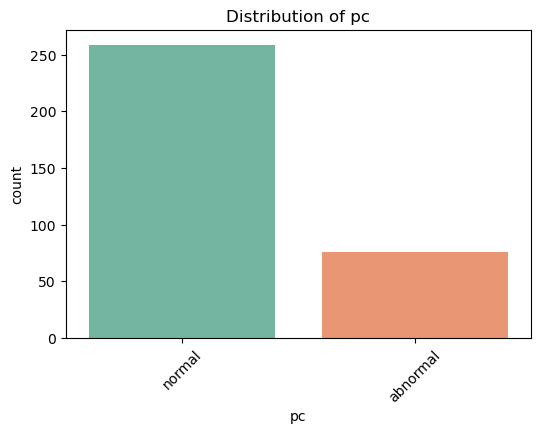

C:\Users\harit\AppData\Local\Temp\ipykernel_18924\2766343707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


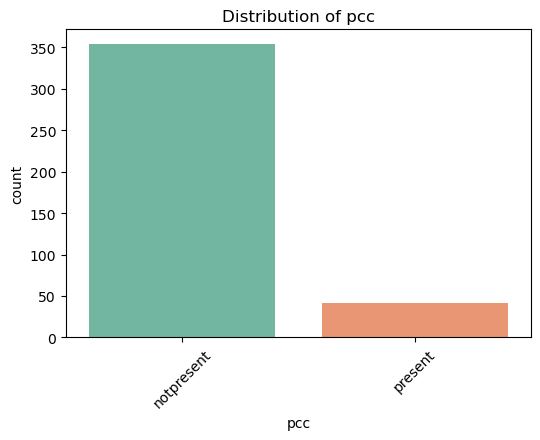

C:\Users\harit\AppData\Local\Temp\ipykernel_18924\2766343707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


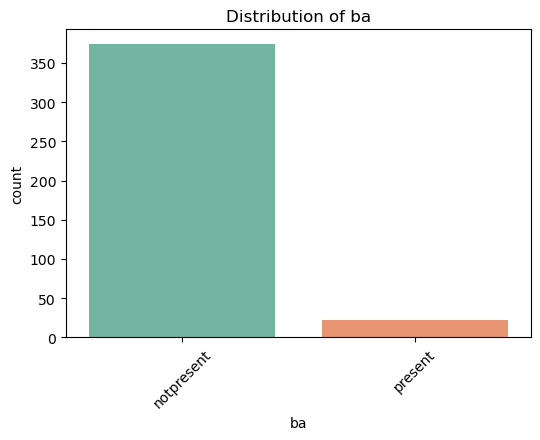

C:\Users\harit\AppData\Local\Temp\ipykernel_18924\2766343707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\harit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


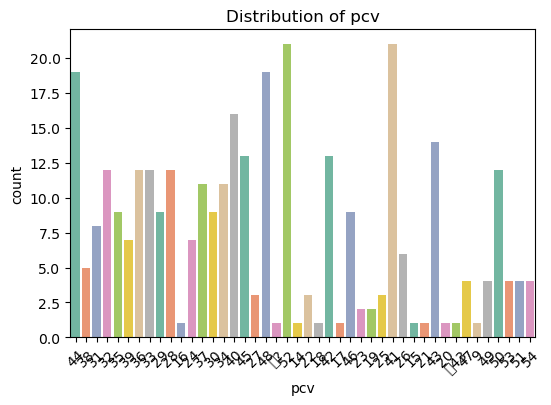

C:\Users\harit\AppData\Local\Temp\ipykernel_18924\2766343707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\harit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


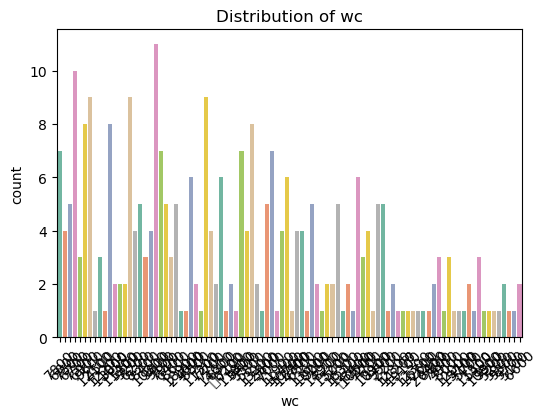

C:\Users\harit\AppData\Local\Temp\ipykernel_18924\2766343707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\harit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


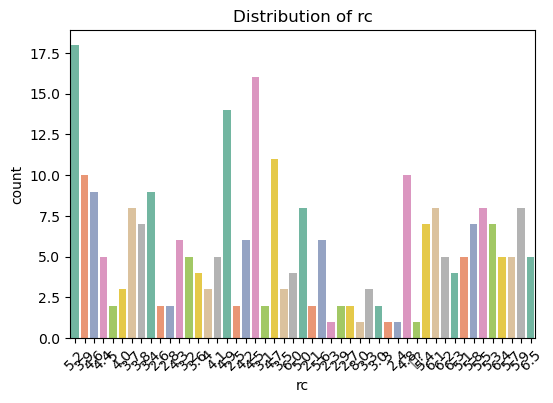

C:\Users\harit\AppData\Local\Temp\ipykernel_18924\2766343707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


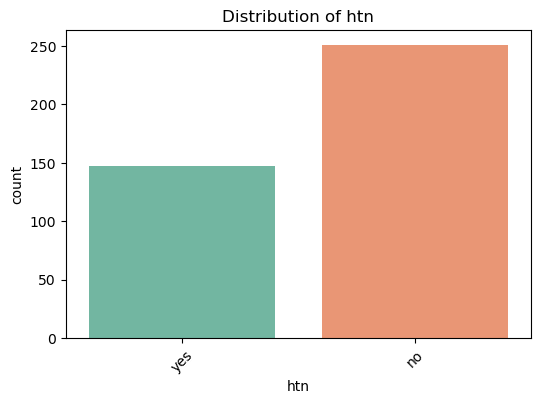

C:\Users\harit\AppData\Local\Temp\ipykernel_18924\2766343707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\harit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


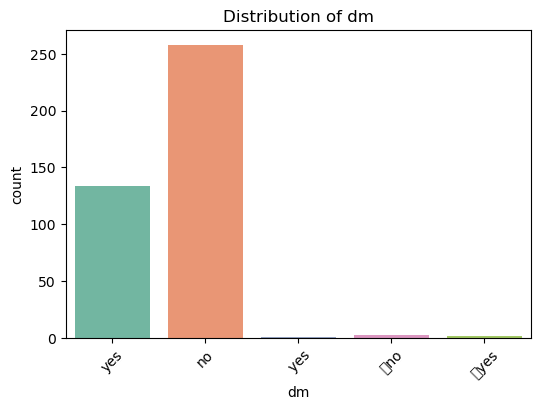

C:\Users\harit\AppData\Local\Temp\ipykernel_18924\2766343707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\harit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


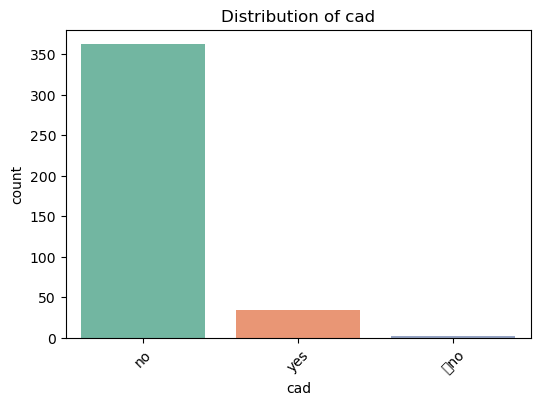

C:\Users\harit\AppData\Local\Temp\ipykernel_18924\2766343707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


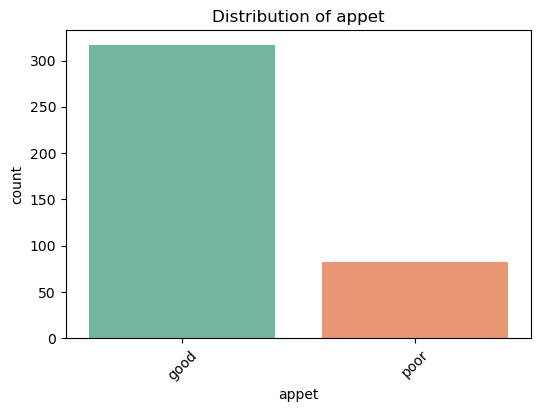

C:\Users\harit\AppData\Local\Temp\ipykernel_18924\2766343707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


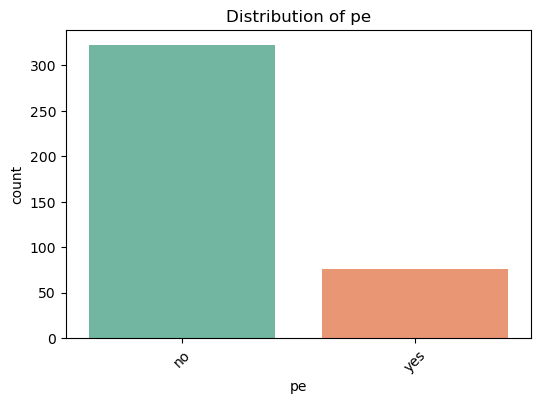

C:\Users\harit\AppData\Local\Temp\ipykernel_18924\2766343707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


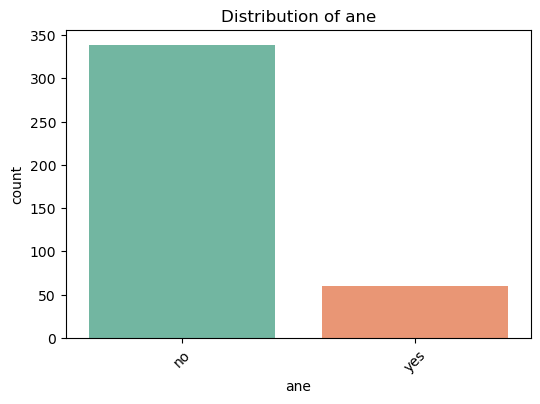

C:\Users\harit\AppData\Local\Temp\ipykernel_18924\2766343707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\harit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


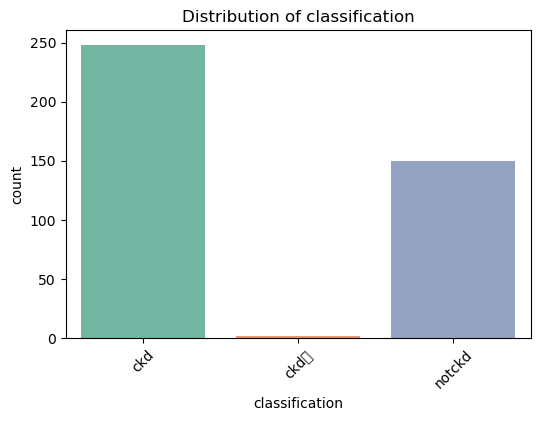

In [7]:
#Bar charts for categorical variables
for col in df.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

#### Data Cleaning and Preprocessing

In [8]:

#Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

print("✅ Data Cleaning and Encoding Completed")
df.head()

✅ Data Cleaning and Encoding Completed


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,11,42,14,1,0,0,1,1,1,0
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,8,11,12,1,1,0,1,0,1,0
11,11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,...,11,25,13,1,1,0,1,1,0,0
14,14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,...,0,8,2,1,1,1,1,1,0,0
20,20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,...,4,63,7,1,1,1,1,1,1,0


####  Exploratory Data Analysis (EDA)

               id         age          bp          sg          al          su  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean   274.841772   49.563291   74.050633    1.019873    0.797468    0.253165   
std    102.998517   15.512244   11.175381    0.005499    1.413130    0.813397   
min      3.000000    6.000000   50.000000    1.005000    0.000000    0.000000   
25%    243.000000   39.250000   60.000000    1.020000    0.000000    0.000000   
50%    298.500000   50.500000   80.000000    1.020000    0.000000    0.000000   
75%    355.750000   60.000000   80.000000    1.025000    1.000000    0.000000   
max    399.000000   83.000000  110.000000    1.025000    4.000000    5.000000   

              rbc          pc         pcc          ba  ...         pcv  \
count  158.000000  158.000000  158.000000  158.000000  ...  158.000000   
mean     0.886076    0.816456    0.088608    0.075949  ...   20.569620   
std      0.318729    0.388343    0.285080    0.2

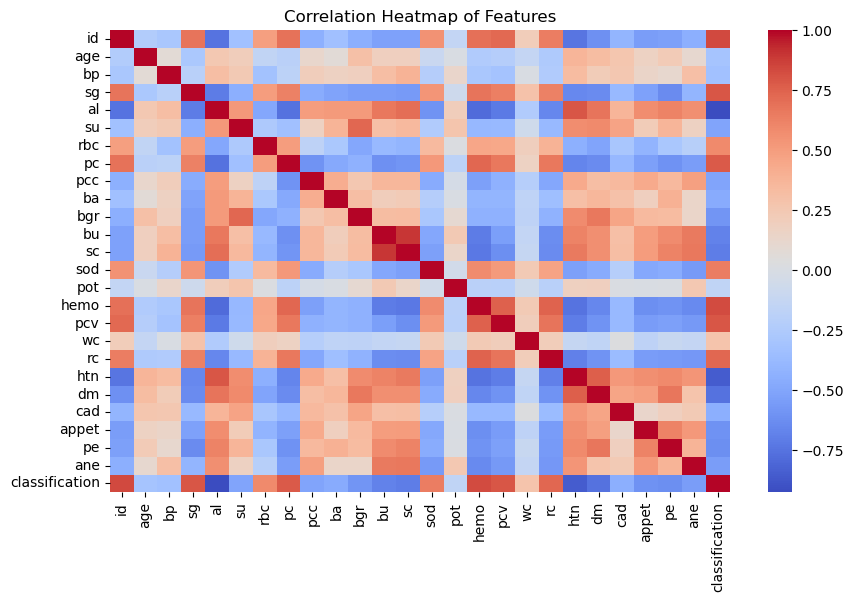

In [11]:
#Summary statistics
print(df.describe())

#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

####  Define Features and Target

In [12]:

X = df.drop('classification', axis=1)
y = df['classification']

print("✅ Features and Target Defined")
print("X Shape:", X.shape)
print("y Shape:", y.shape)
X = df.drop('classification', axis=1)
y = df['classification']

print("✅ Features and Target Defined")
print("X Shape:", X.shape)
print("y Shape:", y.shape)

✅ Features and Target Defined
X Shape: (158, 25)
y Shape: (158,)
✅ Features and Target Defined
X Shape: (158, 25)
y Shape: (158,)


#### Split Data into Training and Testing Sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data Split Completed")
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

✅ Data Split Completed
Training Samples: 126
Testing Samples: 32


#### Initialize Machine Learning Models


In [25]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
#Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

print("✅ Models Initialized Successfully")

✅ Models Initialized Successfully


#### Train Models

In [26]:
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

print("✅ Model Training Completed")



✅ Model Training Completed


#### Make Predictions

In [27]:
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

print("✅ Predictions Generated")


✅ Predictions Generated


#### Evaluate Model Performance

In [28]:
#Random Forest Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

#Gradient Boosting Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))


Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Gradient Boosting Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



#### Confusion Matrix Visualization

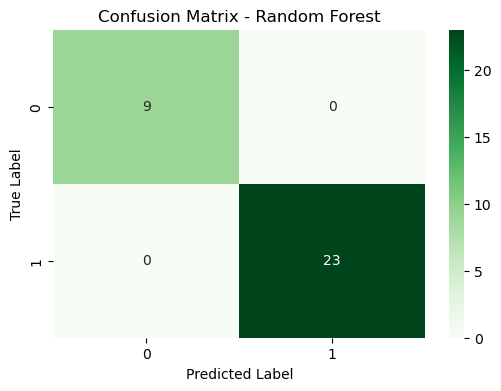

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### Compare Model Accuracies

In [32]:
rf_acc = accuracy_score(y_test, rf_pred)
gb_acc = accuracy_score(y_test, gb_pred)

print(f"Random Forest Accuracy: {rf_acc*100:.2f}%")
print(f"Gradient Boosting Accuracy: {gb_acc*100:.2f}%")

if rf_acc > gb_acc:
    print("🏆 Random Forest performed better for CKD Prediction.")
else:
    print("🏆 Gradient Boosting performed better for CKD Prediction.")

print("🎯 Project Completed Successfully ✅")

Random Forest Accuracy: 100.00%
Gradient Boosting Accuracy: 100.00%
🏆 Gradient Boosting performed better for CKD Prediction.
🎯 Project Completed Successfully ✅
